# REAL RACING 3 VEHICLES - DATA ANALYSIS

# ANALYSIS 2 - Revision 2

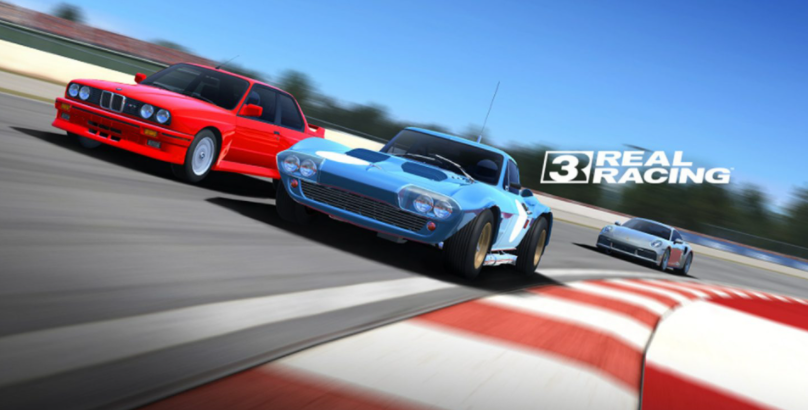

### **Welcome to my 2nd part of data analyses for Real Racing 3 Vehicles!**

_This part has been revised for **game version 10.1** to make all these analyses up-to-date._

As always, let's import all necessary modules and load our vehicle dataset first:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
rr3_df = pd.read_csv('real_racing_3_vehicles_v10_1.csv')

**Important:** It seems that GitHub causes some tables to have unusual resizing and/or print weird characters when the dollar sign `$` appeared in the dataset during rendering. To avoid this issue, all values in `Price` that contain `$` should be changed before the analyses begin.

In [3]:
for i in range(len(rr3_df)):
    if type(rr3_df.loc[i, 'Price']) != float and rr3_df.loc[i, 'Price'][-1] == '$':
        s = rr3_df.loc[i, 'Price'][:-1] + 'dollar'
        rr3_df.loc[i, 'Price'] = s

Before I start, let me check the first few lines of the vehicle dataset...

In [4]:
rr3_df.head(8)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career
0,Acura,NSX (2017),46.7,306,3.10,31.7,1.09,S,M4,1,450 Gold,180,1665.0,Yes,No,No
1,Acura,NSX GT3,65.2,274,3.02,29.6,1.65,R,MR,2,750 Gold,180,1990.0,Yes,No,No
2,Acura,ARX-05,78.5,322,2.80,25.6,1.76,R,MR,1,850 Gold,180,1997.0,Yes,No,No
3,Alfa Romeo,Giulietta TCR,34.5,241,5.30,29.3,1.30,R,FF,1,180 Gold,180,1332.0,Yes,No,No
4,Alfa Romeo,4C,29.4,257,4.34,30.2,1.05,P,MR,1,200 Gold,180,1415.0,Yes,No,No
5,Alfa Romeo,155 V6 TI,38.0,274,4.60,29.0,1.35,R,F4,2,300 Gold,180,1665.0,Yes,Yes,No
6,Ariel,Atom 3.5,44.5,249,2.70,30.5,1.00,S,RR,2,255000 Rdollar,140,1170.0,Yes,No,Yes
7,Ariel,Atom V8,61.1,322,2.30,30.5,1.20,S,RR,3,150 Gold,180,1402.0,Yes,Yes,Yes


All right, everything is loaded properly; I assure that there seems to be no problem here.

**Let me summarize what I did in the 1st part:** Performed many data analyses such as _selecting some vehicles one by one,_ _finding the minimum and maximum values w.r.t. their characteristics,_ _discussions on servicing time,_ etc. 

_**OK, I would like to continue for more advanced analysis in order to gain more insights...**_

First of all, let's see how many **manufacturers take part** currently in this racing game:

In [5]:
len(rr3_df['Manufacturer'].value_counts())

42

Whoa! **42**, eh? There are many many manufacturers than I expected! Well, however, before inspecting the manufacturer names, I think there are **at least one or two** of them that do not seem to be a car manufacturer at all. Let me investigate the unique names now:

In [6]:
rr3_df['Manufacturer'].unique()

array(['Acura', 'Alfa Romeo', 'Ariel', 'Aston Martin', 'Audi', 'Bentley',
       'BMW', 'Brabham', 'Bugatti', 'Cadillac', 'Caterham', 'Chevrolet',
       'Dodge', 'Ferrari', 'Ford', 'Formula 1', 'Formula E', 'Hennessey',
       'Holden', 'Honda', 'Hyundai', 'Jaguar', 'Koenigsegg', 'KTM',
       'Lamborghini', 'Lancia', 'Lexus', 'Lotus', 'Maserati', 'Mazda',
       'McLaren', 'Mercedes-Benz', 'Mercedes-AMG', 'Nissan', 'Pagani',
       'Porsche', 'Renault', 'Shelby', 'Spada', 'SRT', 'Toyota',
       'Volkswagen'], dtype=object)

Ah yes! As you see from the manufacturer names above, **Formula 1** and **Formula E** should not be classified as individual manufacturers! Of course, in order to not disorganize those related vehicles, they were all branded under their motorsport discipline.

Also, if you've ever played the game and inspected the vehicles from **garage menu**, you realize that **the game grouped them together** accordingly. 

Moreover, **Mercedes-Benz** and **Mercedes-AMG** have been appeared to be _two different manufacturers_! Despite this distinction, should I consider them as one whole manufacturer? Yeah, I think so...

In [7]:
rr3_df['Manufacturer'].replace('Mercedes-Benz', 'Mercedes', inplace=True)
rr3_df['Manufacturer'].replace('Mercedes-AMG', 'Mercedes', inplace=True)

And below, these are the **Mercedes vehicles** available to drive in the game; there are total of 11 and see the list below for necessary info:

In [8]:
rr3_df[rr3_df['Manufacturer'] == 'Mercedes'].loc[:, 
       ['Manufacturer', 'Model', 'PR', 'Class', 'Price', 'Service Cost', 'Service Time', 'Exclusive Events', 'In Main Career']]

,Manufacturer,Model,PR,Class,Price,Service Cost,Service Time,Exclusive Events,In Main Career
301,Mercedes,190E 2.5-16 Evolution II,3.5,P,80 Gold,980.0,105,Yes,No
302,Mercedes,A 45,30.5,P,200 Gold,1082.0,120,No,No
303,Mercedes,SLS AMG,37.1,S,260000 Rdollar,1177.0,140,No,Yes
304,Mercedes,SL 65 AMG Black Series,38.3,S,316000 Rdollar,1247.0,150,No,Yes
305,Mercedes,SLS AMG GT3,43.0,R,140 Gold,1415.0,180,No,Yes
306,Mercedes,SLR McLaren 722,48.6,S,450 Gold,1585.0,180,No,No
307,Mercedes,GT3,60.2,R,650 Gold,1665.0,180,Yes,No
308,Mercedes,CLK-LM,56.0,R,640 Gold,1665.0,180,Yes,No
309,Mercedes,GT4,48.3,R,1000000 Mdollar,0.0,180,No,No
310,Mercedes,C 63 Touring Car,64.3,R,600 Gold,1990.0,180,No,No


Yep, this should do the trick! With these discussions in mind, we now actually have **39** different manufacturers, still a lot and nice for a racing game that gets updates regularly...

At this point, we should be aware that some manufacturers are represented with **just one vehicle**, while some are represented by having already **lost of vehicles** in the roster! So, the question is which manufacturers are represented with **at least 10 vehicles**?

_For the proper result, Formula 1 and Formula E are ignored at all..._

In [9]:
manuCounts = rr3_df['Manufacturer'].value_counts().drop(['Formula 1', 'Formula E'])
manuCounts[manuCounts >= 10]

Porsche         47
Chevrolet       30
Ferrari         27
Nissan          25
Ford            25
Lamborghini     20
BMW             18
Aston Martin    17
McLaren         17
Mercedes        11
Audi            11
Toyota          10
Name: Manufacturer, dtype: int64

From this outcome above, Real Racing 3 favors **Porsche** the most! With **over 40 vehicles**!

Then these manufacturers come after: _Chevrolet,_ _Ferrari,_ _Ford,_ _Nissan,_ _Lamborghini,_ _BMW,_ _Aston Martin,_ _McLaren,_ _Audi,_ _Mercedes_ and _Toyota_.

Note that _Chevrolet,_ _Ferrari,_ _Nissan_ and _Toyota_ have many vehicles discontinued due to especially limited-time purchase period of vehicles from **NASCAR** and previously, from **Supercar Series**.

With the latest update (version 10.1), where **Lamborghini Huracan STO**, **Volkswagen XL Sport**, and **Nissan Leaf Nismo RC** were added, now _Nissan_ has 25 vehicles in total, placing **5th** and _Lamborghini_ has 20, being in the **6th** place. Meanwhile, _Volkswagen_ is one of the newest manufacturer available in the game and along with the **XL Sport**, 2 more vehicles could be found: **Golf GTI (2021)** and **ID.R**.

Now in contrast, I'd like to see the names of manufacturers only having **one** vehicle in the game:

In [10]:
manu_one_vehicle = (rr3_df['Manufacturer'].value_counts() == 1).values
print(rr3_df['Manufacturer'].value_counts().index.values[manu_one_vehicle])

['KTM' 'SRT' 'Brabham' 'Cadillac' 'Caterham' 'Lancia']


All right, 6 manufacturers with only **one** vehicle available for purchase! Well, what are the details about these vehicles?

In [11]:
manu_names_one_v = rr3_df['Manufacturer'].value_counts().index.values[manu_one_vehicle]
manu_values = rr3_df['Manufacturer'].values
manu_names_one_v_indexes = []
for i in range(manu_values.size):
    if manu_values[i] in manu_names_one_v:
        manu_names_one_v_indexes.append(i)
rr3_df.loc[manu_names_one_v_indexes, :]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career
58,Brabham,BT62,68.9,319,2.88,27.4,1.55,R,MR,2,800 Gold,180,1997.0,Yes,Yes,No
67,Cadillac,DPI-V.R,78.5,325,2.76,26.2,1.75,R,MR,2,850 Gold,180,1997.0,Yes,No,No
68,Caterham,Seven 620 R,49.1,249,2.70,32.0,1.18,S,FR(RHD),2,378500 Rdollar,165,1312.0,Yes,No,Yes
248,KTM,X-Bow R,46.6,232,3.80,32.0,1.50,S,RR,3,115 Gold,150,1247.0,Yes,No,Yes
269,Lancia,LC2,82.5,385,2.80,28.3,1.80,R,MR,1,900 Gold,180,1997.0,Yes,No,No
396,SRT,Viper GTS,42.4,332,3.50,32.3,1.06,S,FR,3,176000 Rdollar,115,1037.0,Yes,No,Yes


**There they are!** As you can see above, we realize that _Caterham Seven 620 R,_ _SRT Viper GTS,_ and _KTM X-Bow R_ appear within the main career series at reasonable prices. The rest are much more expensive, ranging from **800 to 900 Gold**!

As we stated above, this game has **several vehicles discontinued** for sale! Now is the time to reveal the list...

In [12]:
rr3_df[rr3_df['Availability'] == 'No'].loc[:, ['Manufacturer', 'Model', 'PR', 'Class', 'Series', 'Price']]

,Manufacturer,Model,PR,Class,Series,Price
73,Chevrolet,SS (NASCAR Academy),25.6,R,1,200000 Rdollar
82,Chevrolet,SS (Hendrick Motorsports - 2015),44.1,S,1,500 Gold
83,Chevrolet,SS (Stewart-Haas Racing - 2015),44.1,S,1,500 Gold
84,Chevrolet,SS (Stewart-Haas Racing - 2016),44.2,S,1,500 Gold
85,Chevrolet,SS (Hendrick Motorsports - 2016),44.2,S,1,500 Gold
86,Chevrolet,SS (Hendrick Motorsports - 2017),43.5,S,1,500 Gold
87,Chevrolet,Camaro ZL1 (2018),43.8,R,1,500 Gold
88,Chevrolet,Camaro ZL1 (2019),45.7,R,2,500 Gold
89,Chevrolet,Camaro ZL1 1LE (Hendrick Motorsports - 2020),43.8,R,1,2150000 Mdollar
90,Chevrolet,Camaro ZL1 1LE (Chip Ganassi Racing - 2020),43.8,R,1,2150000 Mdollar


That's a long list! My knowledge did not prove me wrong. These all are either from **NASCAR** or **Supercars** series!

About the details, _Ford Falcon FG X,_ _Holden Commodore VF,_ _Nissan Altima,_ all ranging from **2016 to 2018 models**, were raced under **Supercars** series. And, the others, you know, are from **NASCAR**. Due to limited licensing to these vehicles within the game, newcomers can no longer access them! But, you should consider yourself lucky if you already purchased at least one of them, because you can **still race with them** in their own motorsport series.

Moreover, no vehicles here were from **P class**; most of them had 1 series for racing, sometimes 2; only the 2020 and 2021 model NASCAR were purchasable with **M\$**, previous ones were eligible to buy with **Gold**, even **R\$**.

Lastly, the **2021 Season NASCAR vehicles** (there are 8 in total) had their own **expiry times**! After 1st of February 2022, they disappeared once and for all!

With this controversy above, this raised another question: In the current version 10.1, **how many vehicles can we see in the game right now?**

In [13]:
availability = {'available': 0, 'not available': 0}
for status in rr3_df['Availability'].values:
    if status == 'Yes':
        availability['available'] += 1
    else:
        availability['not available'] += 1
for k, v in availability.items():
    print("There are {} vehicles {} for sale.".format(v, k))

There are 365 vehicles available for sale.
There are 45 vehicles not available for sale.


So, in the above statements, there are total of **45** vehicles that are discontinued,as I said these were from **Supercars** and **NASCAR**. However, any player can access to **365** different vehicles right now. Should a big number for a racing game, do you agree?

Anyway, remember the manufacturers list above that exist with at least 10 vehicles where the discontinued ones were included. This time, if we **exclude all these discontinued vehicles altogether**, then how does the list get changed?

In [14]:
rr3_df_available = rr3_df[rr3_df['Availability'] == 'Yes']
manuCounts_avai = rr3_df_available['Manufacturer'].value_counts().drop(['Formula 1', 'Formula E'])
manuCounts_avai[manuCounts_avai >= 10]

Porsche         47
Ferrari         27
Nissan          22
Lamborghini     20
BMW             18
McLaren         17
Aston Martin    17
Chevrolet       14
Ford            11
Audi            11
Mercedes        11
Name: Manufacturer, dtype: int64

As we expect, **Chevrolet** has seen a significant decrease with the vehicle count, from **30** to **14**! Likewise, **Ford**'s count has fallen down to **11** (which was **25**)! **Nissan** hasn't get affected much as there was only a reduction of **3**. 

Well, where's **Toyota**? Oh, it is certain that now there was only **1** vehicle left:

In [15]:
rr3_df_available[rr3_df_available['Manufacturer'] == 'Toyota']

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career
406,Toyota,TS040 Hybrid (2014),89.4,394,2.5,26.2,1.82,R,M4,2,950 Gold,325,2192.0,Yes,No,Yes


**As a side note;** in terms of vehicle variations, could Real Racing 3 still compete with other popular racing games, especially from PC, PlayStation or Xbox consoles, such as _Gran Turismo Sport,_ _Gran Turismo 7,_ _Assetto Corsa (with mods),_ _Forza Motorsport 7,_ _Forza Horizon 4_ or _Forza Horizon 5?_ I'll leave the discussion to you...

**OK, let's continue with another aspect:** We count the vehicles according to their **currency types** of their purchase, including the discontinued ones. As we know there are 3 different currencies available: `R$`, `Gold`, `M$`

In [16]:
purchase_type = {'Rdollar': 0, 'Gold': 0, 'Mdollar': 0, 'Unspecified': 0}
for val in rr3_df['Price'].values:
    if 'Rdollar' in str(val):
        purchase_type['Rdollar'] += 1
    elif 'Gold' in str(val):
        purchase_type['Gold'] += 1
    elif 'Mdollar' in str(val):
        purchase_type['Mdollar'] += 1
    else:
        purchase_type['Unspecified'] += 1
print(purchase_type)

{'Rdollar': 82, 'Gold': 226, 'Mdollar': 101, 'Unspecified': 1}


Oh, from this output above, there are lots of vehicles **(over 200)** with purchase type `Gold`!

And those with `M$` must be accessible from **Motorsport disciplines** only. Let me remind you again which ones are utilized with `M$`: _Formula 1,_ _Formula E,_ _GT3,_ _GT4,_ _EuroMaster,_ _NASCAR,_ _several series from Endurance and Prototypes_.

In addition, only **82** vehicles can be bought with `R$`, significantly lower than `Gold`, to be honest.

Here, I noticed that only 1 vehicle was marked with **unspecified**. Could that be because the price info was missing for that such vehicle? Let me confirm this:

In [17]:
rr3_df[rr3_df['Price'].isna()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career
408,Volkswagen,XL Sport,23.7,270,5.5,32.0,1.25,R,M4,1,NaN,180,NaN,Yes,No,No


Just as I thought! One vehicle with no price value entered, **Volkswagen XL Sport** which is one of additions from the latest version of the game and **difficult** to get the value, including the Service Cost, due to being **the prize car** of its own round in Season 1 Events. Anyway, it was important to unveil that info, thus our minds do not get confused no more...

Finally, the percentage of vehicles with **Gold purchase-type** is seen below; that is, unsurprisingly, more than a half:

In [18]:
print("Percentage of vehicles with purchase type Gold: {:.5}".format(purchase_type['Gold']/rr3_df.shape[0] * 100))

Percentage of vehicles with purchase type Gold: 55.122


All right, now I want to make a **sub-dataset** that involves vehicles that are purchasable with `R$`; and get valuable numerical info about them:

_Here, it is convenient to reset the indexes of that subset; plus, remove the vehicle with unspecified price to avoid errors..._

In [19]:
rr3_df_with_prices = rr3_df.drop(408, axis=0)
rr3_df_rdollar = rr3_df_with_prices[rr3_df_with_prices['Price'].str.contains('Rdollar')]
rr3_df_rdollar = rr3_df_rdollar.reset_index().drop('index', axis=1)
round(rr3_df_rdollar.describe(), 2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost
count,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00
mean,36.31,301.82,4.05,32.52,1.08,2.88,128.40,1145.27
std,20.29,45.40,1.14,3.64,0.21,1.19,82.16,482.74
min,0.10,204.00,2.57,25.60,0.72,1.00,1.00,285.00
25%,19.65,265.00,3.22,30.50,0.94,2.00,45.00,688.00
50%,39.35,311.00,3.70,31.85,1.02,3.00,130.00,1160.00
75%,50.45,330.00,4.57,33.50,1.20,3.00,178.75,1473.75
max,89.90,433.00,8.20,48.20,1.90,7.00,320.00,2165.00


This tells us a lot! But, if you notice, one important thing is missing, **the numbers of purchase cost**. Since the corresponding column I used for getting this subset was identified with **"object"** datatype, thus not a whole integer, then I have got to add a new column to include only these numbers and therefore, this column could be probably considered as **"integer"**.

Let's print these analyses again:

In [20]:
rdollar_values = []
for val in rr3_df_rdollar['Price']:
    rdollar_values.append(int(val.split()[0]))
rr3_df_rdollar['Purchase Value'] = rdollar_values
rr3_df_rdollar.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00
mean,36.31,301.82,4.05,32.52,1.08,2.88,128.40,1145.27,556630.43
std,20.29,45.40,1.14,3.64,0.21,1.19,82.16,482.74,798846.05
min,0.10,204.00,2.57,25.60,0.72,1.00,1.00,285.00,22000.00
25%,19.65,265.00,3.22,30.50,0.94,2.00,45.00,688.00,85875.00
50%,39.35,311.00,3.70,31.85,1.02,3.00,130.00,1160.00,257500.00
75%,50.45,330.00,4.57,33.50,1.20,3.00,178.75,1473.75,590325.00
max,89.90,433.00,8.20,48.20,1.90,7.00,320.00,2165.00,4000000.00


Done! If you agree with me, it is worthwhile to have these purchase values in a separate column (the rightmost) as **integers** after the hassle of fetching and converting operations in data analysis.

Here, for the **Puchase Value** column, there's a huge difference between _min_ and _max_ values, thus **immensely high mean** and **standard deviation** as expected! 


By the way, w.r.t. `R$`, I wonder what the cheapest and the most expensive vehicles are...

In [21]:
rr3_df_rdollar[rr3_df_rdollar['Purchase Value'] == rr3_df_rdollar['Purchase Value'].min()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career,Purchase Value
43,Hyundai,Veloster Turbo,1.6,225,7.3,41.8,0.85,P,FF,2,22000 Rdollar,5,285.0,Yes,No,No,22000


In [22]:
rr3_df_rdollar[rr3_df_rdollar['Purchase Value'] == rr3_df_rdollar['Purchase Value'].max()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career,Purchase Value
7,Audi,R18 E-Tron Quattro (2014),89.9,377,2.57,25.6,1.9,R,M4(RHD),2,4000000 Rdollar,320,2165.0,Yes,No,Yes,4000000


Ah, it is unveiled that the cheapest one with `R$` is **Hyundai Veloster Turbo**, while, on the contrary, the most expensive one is **Audi R18 E-Tron Quattro (2014)** (both still unchanged in version 10.1)! As you can guess, the former can be raced in _Amateur_ career part, and the latter can only appear in _Endurance Series_ (both in _Legend_ career part and _Motorsports_).

Now, I'd like to do everything the same as above for vehicles with **Gold**:

In [23]:
rr3_df_gold = rr3_df_with_prices[rr3_df_with_prices['Price'].str.contains('Gold')]
rr3_df_gold = rr3_df_gold.reset_index().drop('index', axis=1)
gold_values = []
for val in rr3_df_gold['Price']:
    gold_values.append(int(val.split()[0]))
rr3_df_gold['Purchase Value'] = gold_values
rr3_df_gold.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,226.00,226.00,226.00,226.00,226.00,226.00,226.00,224.00,226.00
mean,53.06,318.19,3.52,30.66,1.36,2.02,178.36,1637.44,543.52
std,24.62,49.67,1.12,5.36,0.42,1.10,44.50,351.24,279.23
min,0.10,180.00,1.90,14.30,0.77,1.00,30.00,582.00,40.00
25%,40.52,290.00,2.77,28.08,1.06,1.00,180.00,1415.00,300.00
50%,50.90,320.00,3.20,29.90,1.29,2.00,180.00,1627.00,555.00
75%,71.58,340.75,3.79,32.00,1.60,3.00,180.00,1990.00,750.00
max,130.30,502.00,8.00,48.80,4.00,6.00,325.00,2192.00,1200.00


Again, this tells lots of valueable information! I'll leave the interpretation to you.

However, let me reveal **the cheapest** and **the most expensive** vehicles together with purchase type `Gold`:

In [24]:
rr3_df_gold[rr3_df_gold['Purchase Value'].isin([min(rr3_df_gold['Purchase Value']), max(rr3_df_gold['Purchase Value'])])]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career,Purchase Value
152,McLaren,MP4-X,130.3,402,1.9,14.3,4.00,R,MR(MHD),2,1200 Gold,240,2117.0,Yes,Yes,No,1200
212,Renault,Clio Cup,5.7,238,5.8,36.3,0.99,S,FF,2,40 Gold,40,630.0,Yes,No,No,40


Here comes the most expensive vehicle with Gold: **McLaren MP4-X**. I'm not surprised with that as we encountered it previously somewhere in the 1st part of analyses, right?

On the other hand, **Renault Clio Cup** is the cheapest with Gold, that made me surprised though! You could drive this vehicle in some bonus career series within **Pro/AM** (and **Season 1**).

Furthermore, **the same numerical analyses** with `M$` purchase-type vehicles:

In [25]:
rr3_df_mdollar = rr3_df_with_prices[rr3_df_with_prices['Price'].str.contains('Mdollar')]
rr3_df_mdollar = rr3_df_mdollar.reset_index().drop('index', axis=1)
mdollar_values = []
for val in rr3_df_mdollar['Price']:
    mdollar_values.append(int(val.split()[0]))
rr3_df_mdollar['Purchase Value'] = mdollar_values
rr3_df_mdollar.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,101.00,101.00,101.00,101.00,101.00,101.00,101.0,101.0,101.00
mean,71.45,279.46,2.98,24.90,1.87,1.38,180.0,0.0,1969801.98
std,31.50,30.64,0.79,5.58,0.81,0.53,0.0,0.0,504830.63
min,16.10,224.00,2.01,16.20,0.98,1.00,180.0,0.0,0.00
25%,48.30,243.00,2.08,17.40,1.35,1.00,180.0,0.0,1950000.00
50%,55.90,291.00,2.99,27.10,1.49,1.00,180.0,0.0,2150000.00
75%,115.60,311.00,3.45,29.30,3.01,2.00,180.0,0.0,2150000.00
max,116.00,317.00,5.80,34.10,3.06,3.00,180.0,0.0,2500000.00


If you take a look at the table above, you'll recogize that **Service Time** for `M$` purchase-type vehicles always appear as **180 minutes**! Likewise, their **Service Cost** is always FREE.

Well, strangely, the **minimum purchase value** is zero. Is this an error or intentionally determined?

In [26]:
rr3_df_mdollar[rr3_df_mdollar['Purchase Value'] == rr3_df_mdollar['Purchase Value'].min()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career,Purchase Value
27,Formula 1,F1 Academy Car,110.3,306,2.15,18.3,3.0,R,MR,1,0 Mdollar,180,0.0,Yes,No,No,0


Ah, that's right! The **F1 Academy Car** is FREE to get; enabling you to jump into the Formula 1 action in no time, right?

And, I suppose there should exist **more than one vehicle** that are purchased with the maximum `M$` value...

In [27]:
rr3_df_mdollar[rr3_df_mdollar['Purchase Value'] == rr3_df_mdollar['Purchase Value'].max()] \
    [['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Purchase Value']]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Purchase Value
38,Formula 1,Renault DP World F1 Team R.S. 20,115.8,312,2.07,16.5,3.03,2500000
39,Formula 1,Aston Martin Red Bull Racing RB16,115.9,311,2.06,16.5,3.05,2500000
40,Formula 1,Scuderia AlphaTauri Honda AT01,115.6,312,2.08,17.4,3.02,2500000
41,Formula 1,Scuderia Ferrari SF1000,115.8,311,2.06,16.5,3.04,2500000
42,Formula 1,Mercedes-AMG Petronas Formula One Team W11 EQ ...,116.0,309,2.03,16.2,3.05,2500000
43,Formula 1,Haas F1 Team VF-20,115.6,312,2.07,17.4,3.01,2500000
44,Formula 1,Alfa Romeo Racing Orlen C39,115.6,315,2.10,17.7,3.01,2500000
45,Formula 1,McLaren F1 Team MCL35,115.8,312,2.06,16.5,3.04,2500000
46,Formula 1,BWT Racing Point F1 Team RP20,115.8,311,2.05,16.5,3.04,2500000
47,Formula 1,Williams Racing FW43,115.6,314,2.10,17.4,3.01,2500000


Correct! These are all from **2020 and 2021 Season of Formula 1**. But, there are opportunities to obtain them for FREE if you can finish the **special Grand Prix events** within the allocated time (like 5 or 7 days) and those could be found within the **Seasonal Rounds section**, as well as **tuning setups** for each race track.

_By the way, you may want to check the stats for all F1 cars above and wisely choose which ones are suitable for racing through several well-known F1 tracks..._

Next, let's perform **grouping some values** through features and get any other remarkable knowledge for us all!

In [28]:
rr3_df.groupby('Class')['Model'].count()

Class
P     65
R    216
S    129
Name: Model, dtype: int64

Well, only **65** vehicles are classified as **P (Product)**, then **129** of them are **S (Super)**; and, it is somewhat weird to see the vehicle roster encompasses **R (Race)**-classed ones the most, which is **216**. Could that be because of involving many motorsport series and some important career series?

Next, how about **the drive types**?

In [29]:
drive_types = rr3_df.groupby('Type')['Model'].count()
types_merged = {}
for i in range(len(drive_types)):
    dt = drive_types.index[i][:2]
    if dt in types_merged:
        types_merged[dt] += drive_types[i]
    else:
        types_merged[dt] = drive_types[i]
for k, v in types_merged.items():
    print("{:3} -> {:4}".format(k, v))

F4  ->   17
FF  ->   10
FR  ->  145
M4  ->   37
MR  ->  167
R4  ->    3
RR  ->   31


This time, data wrangling actions were applied in order to consolidate the count values into their proper drive types and it is better to show them in a much cleaner format like above.

Here, even in version 10.1, vehicles with **MR** drive types (they should be **Mid engine, Real-wheel drive**) are the most common, then **FR** comes afterwards. For this game, it is extremely rare to see vehicles with **R4** drive types. 

Well, I really wonder which vehicles are specified with **R4** type...

In [30]:
rr3_df[rr3_df['Type'] == 'R4'].loc[:,'Manufacturer':'Price'] 

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
112,Ferrari,FF,38.3,335,3.7,33.5,1.00,S,R4,2,585000 Rdollar
343,Porsche,911 Turbo (2009),43.8,311,3.4,30.5,1.05,S,R4,4,148000 Rdollar
370,Porsche,911 Turbo S,79.2,330,2.6,26.8,1.40,S,R4,1,725 Gold


Oh, I remember these **three** vehicles! Once upon a time, I bought and drove the first two in several events. Why didn't I notice that in advance!? About **Porsche 911 Turbo S**, that was the newest addition in this type several versions ago, but I only had the chance to drive in the limited-time series, hence did not buy it yet...

Lastly, let's analyze the breakdown of count of career series eligibility among all vehicles. Here, I'd like to show this info with a visualization; **bar chart**:

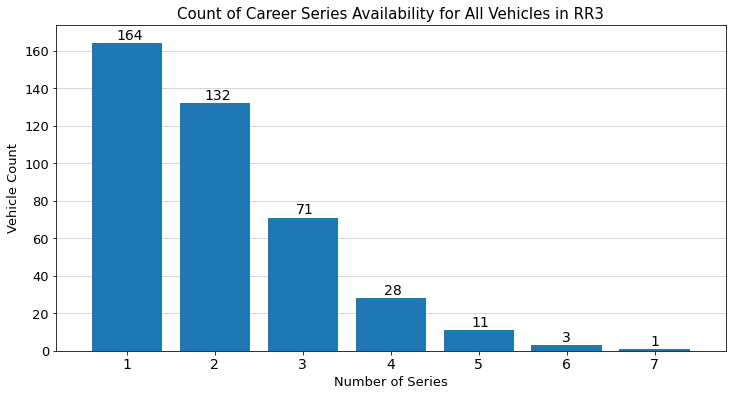

In [31]:
series_count = rr3_df.groupby('Series')['Model'].count()
plt.figure(figsize=(12,6))
plt.bar(range(1,8), series_count, zorder=2)
plt.title('Count of Career Series Availability for All Vehicles in RR3', fontsize=15)
plt.xlabel('Number of Series', fontsize=13)
plt.ylabel('Vehicle Count', fontsize=13)
for i in range(1,len(series_count)+1):
    if series_count[i] >= 100:   plt.text(i-0.12, series_count[i]+2, series_count[i], fontsize=14)
    elif series_count[i] >= 10:   plt.text(i-0.08, series_count[i]+2, series_count[i], fontsize=14)
    else:   plt.text(i-0.05, series_count[i]+2, series_count[i], fontsize=14)
plt.grid(axis='y', color='#cccccc', zorder=1)
plt.margins(0.06)
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.show()

With many settings for full proper visualization in the figure, here's the **bar chart**!

We can claim that **approximately 300** vehicles can be driven in only **1 or 2 career series**. Are they worth buying and upgrading, hmm? By the way, the rest looks like more preferable to own and upgrade, though. Ah, if you ever wonder which vehicle has **7 different career series** for driving, check my 1st data analysis!

Unlike the previous revision of the data analysis, there is **no vehicle** not having any career series. Some time ago, **F1 Academy Car** was found as the only one with no series, just the daily races in F1 section. Now, you are able to drive it through the **F1 Exhibition Events**, especially to get you prepared for more challenging events with real F1 cars.

### **OK, folks! That's enough for 2nd part of my Real Racing 3 data analysis!**

**I believe we have gained more knowledge on vehicles available in this game and hope that you enjoyed a lot! I promise that there will be lots of visualizations through in the next part of my analysis. You know any graph could explain a thousand words than the statements here, right?** 

## **Stay tuned and as always, keep racing!**